# Group Project Searching for an effective model
By Ashley Snell, Jeremy Taylor, Sydney Small

We are looking at what models work best for out data when we use age and education as predictors for whether or not people are users of marijuana. Users are people who have used in the last month. 

In [1]:
import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as pltco
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [2]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':1,'CL5':1,'CL6':1,0:0, 1:1} #only counting people who used in last month as users.
druguser.Cannabis = druguser.Cannabis.map(names)
druguser.Semer = druguser.Semer.map(names)
druguser.Nicotine = druguser.Nicotine.map(names)
druguser.LSD = druguser.LSD.map(names)
druguser.Mushrooms = druguser.Mushrooms.map(names)
druguser.Ecstasy = druguser.Ecstasy.map(names)
druguser.Coke = druguser.Coke.map(names)
druguser.Alcohol = druguser.Alcohol.map(names)

This helps classify 0 as a person who has not used in the last month, and 1 as a user within the last month. This helps minimize our variables down to 2 instead of 7, focusing our testing.

## PCA
We attempt to use PCA to determine a linear combination of variables and what 2 impact the data most. 

[0.26966741 0.1913091  0.11649396 0.1143996  0.08491502]


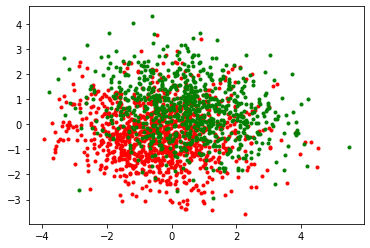

In [3]:
XX = np.array(druguser[['Cscore','Escore','Ascore','Nscore','Impulsive','Oscore','Age','Gender','Education']])
y = np.array(druguser['Cannabis'])
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
XXpca = pca.fit_transform(XX);
plt.plot(XXpca[y==0, 0], XXpca[y==0, 1], 'r.')
plt.plot(XXpca[y==1, 0], XXpca[y==1, 1], 'g.');
print(pca.explained_variance_ratio_)

PCA did not work (0.26 as the highest impact variable). None of the variables had an immense impact compared to the others.

In [4]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

# Attempt at using K Nearest Neighbors, adjusted to best fit graph and see distinction.

In [5]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 0.25, X_train[:, 0].max() + 0.25
    y_min, y_max = X_train[:, 1].min() - 0.25, 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

## K nearest neighbors

Training Error: 0.7374005305039788
Testing Error: 0.7002652519893899


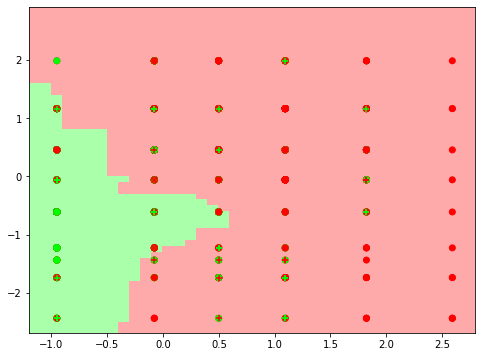

In [6]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

This model for Age, Education and Marjuana had an okay Training formulation but the testing error is drastically lower than the training. Marjuana is hard to have a clear separation because it is a widely used drug amongst all ages and educations. The general trend, however, is  there is more usage among younger, less educated people. 
We do need to consider the fact that age and education are also correlated.

In [7]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Nicotine']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

Training Error: 0.6412466843501327
Testing Error: 0.623342175066313


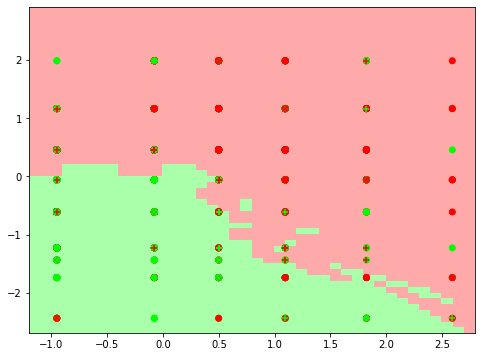

In [8]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

Nicotine is more universal and more legal, so this model did worse than the above variable comparison. The training error was worse, however the model did better when tested (closer errors).

In [9]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Alcohol']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

Training Error: 0.8222811671087533
Testing Error: 0.8249336870026526


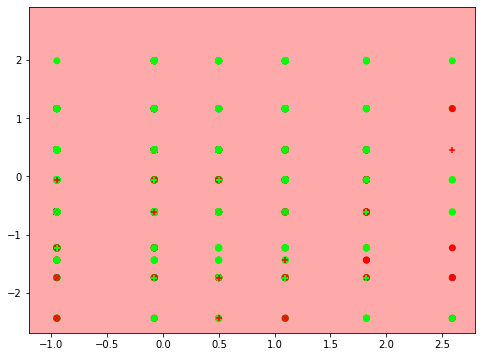

In [10]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

Although the training/testing errors are better than Nicotine, Alcohol is the most widely used substance so the graph is classifying everybody as a drinker, no matter Age or Education.

## This is not a good model for alcohol use most likley because the use of alcohol is widespread throughout age and education. 

# Quadratic Discriminant Analysis 
If the correlation isn't linear, this model will be more useful than the above models.

In [11]:
X = np.array(druguser[['Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

In [12]:
mu_0 = X[y==0].mean()
mu_1 = X[y==1].mean()
mu_0, mu_1

(0.2172289972652689, -0.31151610406091373)

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [15]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training Error: 0.7420424403183024
Testing Error: 0.7055702917771883


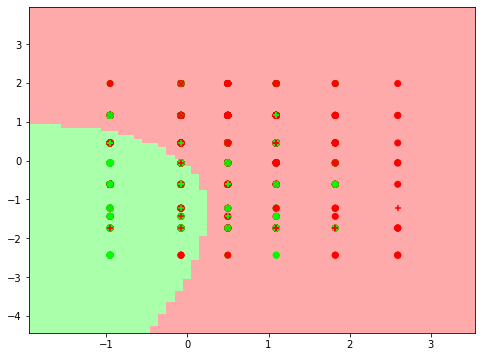

In [16]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)
plot_cat_model(clf2, X_train, y_train, X_test, y_test)

Although the training/testing errors aren't the highest as above models, the graph did a pretty decent job at discriminating between the most commonly seen education/age of marjuana users. This is a better representation than the K nearest neighbors model as it is more flexible and smoother transition between points. This could possibly allow for better overfitting.

Next Steps: Apply newer models, make prettier/applicable graphs, continue narrowing focus using Bootstrapping/Cross Validation

In [17]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)           
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]  
y_test = y[:test]
X_train = X[test:]  
y_train = y[test:]

In [18]:
num = 50 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)

labels = ['train','test']

Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    clf2 = QuadraticDiscriminantAnalysis()
    clf2.fit(X_train, y_train)
    Error.iloc[s, 0] = clf2.score(X_train, y_train) 
    Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
Error_mean = [0]*2
Error_std = [0]*2
for c in range(2):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()
   

,train,test
47,0.730106,0.713528
48,0.740053,0.758621
49,0.754642,0.774536
Mean,0.736194,0.732891
Standard Deviation,0.010668,0.023440


Application of Cross Validation did not work, so Bootstrapping was used. The Training and Testing errors are very close to each other. 

In [19]:
num = 50 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)

labels = ['train','test']

Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    clf2 = KNeighborsClassifier(n_neighbors=100)
    clf2.fit(X_train, y_train)
    Error.iloc[s, 0] = clf2.score(X_train, y_train) 
    Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
Error_mean = [0]*2
Error_std = [0]*2
for c in range(2):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()
   

,train,test
47,0.731432,0.708223
48,0.740716,0.755968
49,0.722149,0.753316
Mean,0.738753,0.736870
Standard Deviation,0.012489,0.023456


After comparing the Quadratic Discriminant Analysis Bootstrap, and K Nearest Neighbors Bootstrap, Quadratic has shown to be the best model for our data, with a higher testing error.

Support Vector Model would not be successful with this data, and is not included for that reason.